In [ ]:
!pip install praw
!pip install spacy==2.2.3

     |████████████████████████████████| 176 kB 4.8 MB/s 
     |████████████████████████████████| 53 kB 982 kB/s 
     |████████████████████████████████| 10.4 MB 4.3 MB/s 
     |████████████████████████████████| 2.2 MB 41.2 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import praw 
import spacy
import random
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Webscrapping

In [ ]:
user = "Web Scraper v1.0 by /u/OliveirasAleatorias" #casimiro2011

reddit = praw.Reddit(client_id="z4Rs1Py7K_8KphLEAjBt5A",       # Replace here the client_id created by Reddit
                     client_secret="teHLH5eIqA0kNkBvxJS25MtzLbYQoQ",   # Replace here the client_secret created by Reddit
                     user_agent=user,
                     check_for_async=False)    # This is your user

In [ ]:
punct = string.punctuation

In [ ]:
pln = spacy.load('en_core_web_sm')
pln

In [ ]:
'''headlines = set()
for submission in reddit.subreddit("wallstreetbets").top("year", limit=None):
    
    if submission.score >= 200:
        headlines.add(submission.title)'''

In [ ]:
# Create DataFreame from set of headlines
headlines_df = pd.DataFrame(headlines)
print(headlines_df.head(5))

                                                   0
0                              Vibe of the past week
1      23 years old and I’m already a single father.
2    I feel like clarification is needed about Today
3  Russian Disrupters? Well FUCK YOU TOO, KIMMEL!...
4  Mark Cuban spent nearly 2 hours answering ques...


In [ ]:
headlines_df.size

996

In [ ]:
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

## Pre Processamento

In [ ]:
def cleanData(text):
    
  # To convert the all uppercase to lowercase
  text = text.lower()
      
  # This is a reguglar expression to replace anything char that is not alphabet or numeric.
  text = re.sub(r"[^A-Za-z0-9]",' ', text)
      
  # The above regular expression itself will take care of punctuation, below is an alternative to remove only punctuation.
  text = ''.join([char for char in text if char not in punct])
      
  # This will remove the stopwords and lemmatize the remaining word to its root word.
  text = [wn.lemmatize(word) for word in text.split(' ') if len(word)!=0]

  return ' '.join(text)

In [ ]:
headlines_df[0] = headlines_df[0].apply(cleanData)

In [ ]:
headlines_df.head(10)

,0
0,vibe of the past week
1,23 year old and i m already a single father
2,i feel like clarification is needed about today
3,russian disrupters well fuck you too kimmel gm...
4,mark cuban spent nearly 2 hour answering quest...
5,i m pleased to announce my weekly gme gain of ...
6,another wsb sea shanty bone in the ocean cover...
7,started with 1200 almost 2 year ago and turned...
8,acktually inflation is good for the economy
9,evergrande chairman pocketed 8 billion in divi...


In [ ]:
#headlines_df.to_csv('sentiment_analysis_wallstreetbets.csv', encoding='utf-8', index=False)

In [ ]:
bogleheads = pd.read_csv('/content/sentiment_analysis_Bogleheads.csv', encoding = 'utf-8')
wallstreetbets = pd.read_csv('/content/sentiment_analysis_wallstreetbets.csv', encoding = 'utf-8')
stocks = pd.read_csv('/content/sentiment_analysis_stocks.csv', encoding = 'utf-8')
investing = pd.read_csv('/content/sentiment_analysis_Investing.csv', encoding = 'utf-8')
cryptocurrency = pd.read_csv('/content/sentiment_analysis_CryptoCurrency.csv', encoding = 'utf-8')

In [ ]:
cryptocurrency

,0
0,dogecoin produce 10 000 coin per block at a ra...
1,i spent at least 5 at burger king every day fr...
2,there isn t doge adoption the opposite is happ...
3,672 938 lb of plastic waste removed from ocean...
4,news man us bitcoin to buy chemical weapon i w...
...,...
912,shiba inu coin soar 22 to another new record a...
913,an act of war against the middle class america...
914,doge is bringing down the quality of the sub l...
915,this flash crash is why crypto won t be mainst...


In [ ]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
base_treinamento = pd.read_csv('/content/Reddit_Data.csv')
base_treinamento

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
base_treino = base_treinamento[0:31662]
base_treino

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
31657,this brand new information,1
31658,became illegal russia disrespect government r...,0
31659,one guy like karan thapar took his breath away...,-1
31660,shanti zara thodi der baithye aur sochiye,0


In [ ]:
base_teste = base_treinamento[31662:]
base_teste

,clean_comment,category
31662,press conference not his streanh,0
31663,very buzy person,1
31664,was only matter time,0
31665,there was venn diagram meme this both nirav an...,0
31666,share this your social media profiles there re...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
base_treino_final = []
for texto, emocao in zip(base_treino['clean_comment'], base_treino['category']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEUTRO': False, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEUTRO': True,  'NEGATIVO': False})
  elif emocao == -1:
    dic = ({'POSITIVO': False, 'NEUTRO': False,  'NEGATIVO': True})


  base_treino_final.append([texto, dic.copy()])

In [ ]:
base_treinamento.to_csv('sentiment_analysis_treino.csv', encoding='utf-8', index=False)

In [ ]:
base_treino_final

[[' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ',
  {'NEGATIVO': False, 'NEUTRO': False, 'POSITIVO': True}],
 ['buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has mad

## Treinamento do Modelo

In [ ]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEUTRO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treino_final)
  losses = {}
  for batch in spacy.util.minibatch(base_treino_final, 512):
    textos = [modelo(str(texto)) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 1.3318108365467651e-05}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
       1.29415646e-04, 1.29415646e-04, 1.29415646e-04, 1.29415646e-04,
      

Text(0, 0.5, 'Erro')

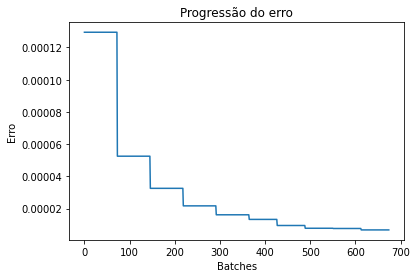

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [ ]:
texto_x = base_teste['clean_comment'][31662]
texto_x

'press conference not his streanh '

In [ ]:
previsao = modelo_carregado(texto_x)
previsao.cats

{'NEGATIVO': 0.0007822437328286469,
 'NEUTRO': 0.9999545812606812,
 'POSITIVO': 5.83672481297981e-05}

In [ ]:
previsoes = []
for texto in base_teste['clean_comment']:
  previsao = modelo_carregado(str(texto))
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_final.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_final.append(-1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_teste['category'].values

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9574011097189905

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[ 979,   26,  103],
       [  19, 2305,   43],
       [  27,   20, 2065]])

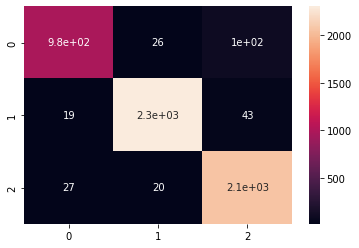

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
cryptocurrency['category'] = '0'
bogleheads['category'] = '0'
wallstreetbets['category'] = '0'
stocks['category'] = '0'
investing['category'] = '0'

In [ ]:
cryptocurrency

,0,category
0,dogecoin produce 10 000 coin per block at a ra...,0
1,i spent at least 5 at burger king every day fr...,0
2,there isn t doge adoption the opposite is happ...,0
3,672 938 lb of plastic waste removed from ocean...,0
4,news man us bitcoin to buy chemical weapon i w...,0
...,...,...
912,shiba inu coin soar 22 to another new record a...,0
913,an act of war against the middle class america...,0
914,doge is bringing down the quality of the sub l...,0
915,this flash crash is why crypto won t be mainst...,0


In [ ]:
previsoesCryptoCurrency = []

for texto in cryptocurrency['0']:
  previsao = modelo_carregado(str(texto))
  previsoesCryptoCurrency.append(previsao.cats)

previsoes_finalCryptoCurrency = []
for previsao in previsoesCryptoCurrency:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_finalCryptoCurrency.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_finalCryptoCurrency.append(-1)
  else:
    previsoes_finalCryptoCurrency.append(0)

previsoes_finalCryptoCurrency = np.array(previsoes_finalCryptoCurrency)

In [ ]:
pd.set_option('display.max_colwidth', None)
cryptocurrency['category'] = previsoes_finalCryptoCurrency
cryptocurrency

,0,category
0,dogecoin produce 10 000 coin per block at a rate of roughly 1 block per minute that s around 14m coin per day let s see how long you can sustain a pump with those number against you,-1
1,i spent at least 5 at burger king every day from 11 1 2021 to 11 21 2021 to win free crypto,1
2,there isn t doge adoption the opposite is happening daily transaction count 15k is the lowest since 2017,0
3,672 938 lb of plastic waste removed from ocean verified by vechain,-1
4,news man us bitcoin to buy chemical weapon i wonder if we ll start seeing man us usd to buy gun article soon,0
...,...,...
912,shiba inu coin soar 22 to another new record after crypto whale buy 277 billion token,1
913,an act of war against the middle class american criticize janet yellen s idea to tax unrealized capital gain,0
914,doge is bringing down the quality of the sub like gme did to investing sub,-1
915,this flash crash is why crypto won t be mainstream for awhile,0


In [ ]:

previsoesinvesting = []
for texto in investing['0']:
  previsao = modelo_carregado(str(texto))
  previsoesinvesting.append(previsao.cats)

previsoes_finalinvesting = []
for previsao in previsoesinvesting:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_finalinvesting.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_finalinvesting.append(-1)
  else:
    previsoes_finalinvesting.append(0)

previsoes_finalinvesting = np.array(previsoes_finalinvesting)
investing['category'] = previsoes_finalinvesting
investing

,0,category
0,nasdaq approves high tide s application to list,1
1,is it a good idea to use roth ira for swing tr...,1
2,last year the top 25 manager earned 32 billion...,1
3,nok q4 2020 earnings eps beaten by 29 67,0
4,why is no one talking about the credit default...,-1
...,...,...
738,full diligence post on palantir pltr earnings ...,1
739,what is your highest held stock,0
740,robinhood surge 25 blow past 38 ipo price,-1
741,i analyzed the last 3 decade of stock market r...,0


In [ ]:
previsoesbogleheads = []
for texto in bogleheads['0']:
  previsao = modelo_carregado(str(texto))
  previsoesbogleheads.append(previsao.cats)

previsoes_finalbogleheads = []
for previsao in previsoesbogleheads:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_finalbogleheads.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_finalbogleheads.append(-1)
  else:
    previsoes_finalbogleheads.append(0)

previsoes_finalbogleheads = np.array(previsoes_finalbogleheads)
bogleheads['category'] = previsoes_finalbogleheads
bogleheads

,0,category
0,i did it 100 vtwax,0
1,i started investing in my 401k 25 year ago thi...,0
2,this is why i boglehead,0
3,the ultrawealthy have hijacked roth ira the se...,1
4,are folk really surprised that this sub promot...,1
...,...,...
189,is it sad i can t wait til january 1 to max ou...,-1
190,i think some folk here are missing the best in...,1
191,why ha insert vanguard fund here dropped by mo...,1
192,vanguard mobile app update coming soon,0


In [ ]:
previsoesstocks = []
for texto in stocks['0']:
  previsao = modelo_carregado(str(texto))
  previsoesstocks.append(previsao.cats)

previsoes_finalstocks = []
for previsao in previsoesstocks:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_finalstocks.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_finalstocks.append(-1)
  else:
    previsoes_finalstocks.append(0)

previsoes_finalstocks = np.array(previsoes_finalstocks)
stocks['category'] = previsoes_finalstocks
stocks

,0,category
0,if the pandemic end won t the metaverse fail m...,-1
1,gamestop completes at the market equity offeri...,0
2,draftkings reach agreement to acquire golden n...,1
3,if short seller lost 38 billion betting agains...,1
4,100 of school bus could be electric within 15 ...,0
...,...,...
994,blackberry ivy aws deepdive,0
995,pelosi reject stock trading ban for member of ...,1
996,msft close at 2 trillion a second u s company ...,0
997,what under the radar stock have you been buying,0


In [ ]:
previsoeswallstreetbets = []
for texto in wallstreetbets['0']:
  previsao = modelo_carregado(str(texto))
  previsoeswallstreetbets.append(previsao.cats)

previsoes_finalwallstreetbets = []
for previsao in previsoeswallstreetbets:
  if previsao['POSITIVO'] > previsao['NEGATIVO'] and previsao['POSITIVO'] > previsao['NEUTRO']:
    previsoes_finalwallstreetbets.append(1)
  elif previsao['NEGATIVO'] > previsao['POSITIVO'] and previsao['NEGATIVO'] > previsao['NEUTRO']:
    previsoes_finalwallstreetbets.append(-1)
  else:
    previsoes_finalwallstreetbets.append(0)

previsoes_finalwallstreetbets = np.array(previsoes_finalwallstreetbets)
wallstreetbets['category'] = previsoes_finalwallstreetbets
wallstreetbets

,0,category
0,vibe of the past week,-1
1,23 year old and i m already a single father,-1
2,i feel like clarification is needed about today,0
3,russian disrupters well fuck you too kimmel gm...,-1
4,mark cuban spent nearly 2 hour answering quest...,1
...,...,...
991,i also browse r antiwork,0
992,attack on wall street pt 1 sub,0
993,aoc turning into dave portnoy,0
994,i see dead hedge fund,-1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


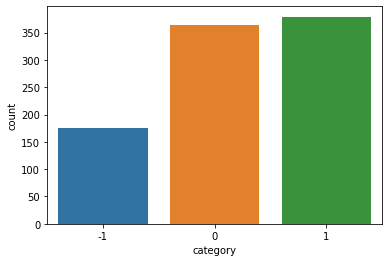

In [ ]:
sns.countplot(cryptocurrency['category'], label = 'Contagem');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


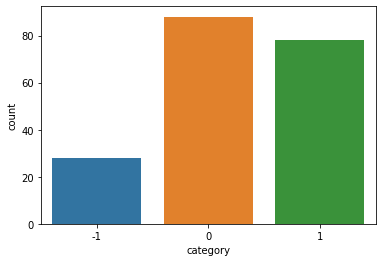

In [ ]:
sns.countplot(bogleheads['category'], label = 'Contagem');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


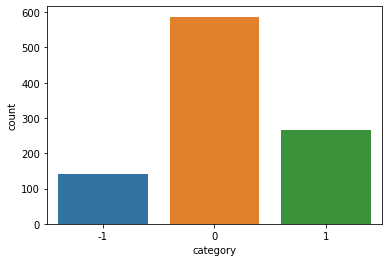

In [ ]:
sns.countplot(wallstreetbets['category'], label = 'Contagem');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


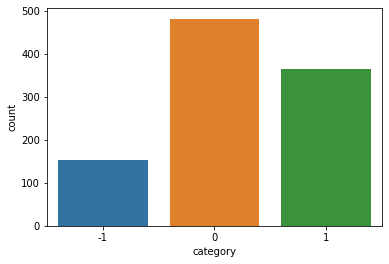

In [ ]:
sns.countplot(stocks['category'], label = 'Contagem');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


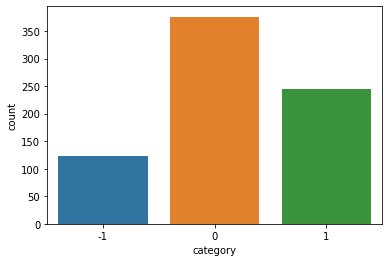

In [ ]:
sns.countplot(investing['category'], label = 'Contagem');